# Players Analyses

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

from matplotlib_venn import venn3, venn3_unweighted

%load_ext nb_black

<IPython.core.display.Javascript object>

# Dictionary

* Player: Player's name;
* Nationality: Country of origin or citizenship;
* Position: Positions played(GK = Goalkeeper,DF = Defender,MF = Midfielders,FW = Forwards, LB = Left Backs, RB = Right Backs, CB = Center Backs, DM = Defensive Midfielders, CM = Central Midielders, LM = Left Midfielders, RM = Right Midfielders, WM = Wide Midfielders, LW = Left Wingers, RW = Right Wingers, AM = Attacking Midfielders);
* Squad: Player's Team
* Age: Age in 2022 season
* Born: Year of Birth
* 90s: Total minutes played divided by 90;
* CrdY: Yellow cards;
* CrdR: Red cards;
* 2CrdY: Second Yellow Card;
* Fls: Fouls Committed;
* Fid: Fouls Drawn;
* Off: Offsides;
* Crs: Crosses;
* Int: Interceptions;
* TklW: Tackles in which the tackler's team won possession of the ball;
* PKwon: Penalty Kicks Won;
* PKcon: Penalty Kicks Conceded;
* OG: Own Goals;
* Recov: Number of loose balls recovered;
* won: Aerial Duels won;
* lost: Aerial Duels lost;


The datasets are from https://fbref.com 

In [3]:
df_Brasileirao_Players = pd.read_csv(
    "FBREF/SerieA-Brasil/Brazil-SerieA-Players-2022.csv", sep=";"
)
df_PremierLeague_Players = pd.read_csv(
    "FBREF/PremierLegue/Premier-League-Players2021-2022.csv", sep=";", decimal="."
)
df_Ligue1_Players = pd.read_csv(
    "FBREF/Ligue1/Ligue-Players-2021-2022.csv", sep=";", decimal="."
)
df_LaLiga_Players = pd.read_csv("FBREF/LaLiga/LaLiga-Players-2022.csv", sep=";")
df_Italy_Players = pd.read_csv(
    "FBREF/SerieA-Italia/SerieA-Players-2021-2022.csv", sep=";"
)
df_ChampionsLeague = pd.read_csv(
    "FBREF/ChampionsLeague/ChampionsLeague-Players-2021-2022.csv", sep=";"
)

GK = Goalkeeper,DF = Defender,MF = Midfielders,FW = Forwards, LB = Left Backs, RB = Right Backs, CB = Center Backs, DM = Defensive Midfielders, CM = Central Midielders, LM = Left Midfielders, RM = Right Midfielders, WM = Wide Midfielders, LW = Left Wingers, RW = Right Wingers, AM = Attacking Midfielders

##  Brazilian Serie A

In [8]:
df_Brasileirao_Players.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,CrdY,CrdR,...,Off,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost
0,1,Abner,brBRA,DF,Atl Paranaense,21,2000,23.4,6,0,...,1,49,39,28,0.0,0.0,0,149.0,21.0,28.0
1,2,Adryelson,brBRA,DF,Botafogo (RJ),23,1998,16.1,1,0,...,2,0,22,12,0.0,0.0,1,56.0,76.0,34.0
2,3,Adson,brBRA,"FW,MF",Corinthians,21,2000,13.8,2,0,...,3,15,13,22,0.0,0.0,0,54.0,8.0,19.0
3,4,Airton,brBRA,FW,Atl Goianiense,22,1999,19.3,3,0,...,1,81,10,24,0.0,0.0,0,60.0,21.0,23.0
4,5,Carlos Alberto,brBRA,"FW,MF",América (MG),19,2002,1.7,1,0,...,0,3,4,1,0.0,0.0,0,5.0,4.0,9.0


<IPython.core.display.Javascript object>

### Position Distribution

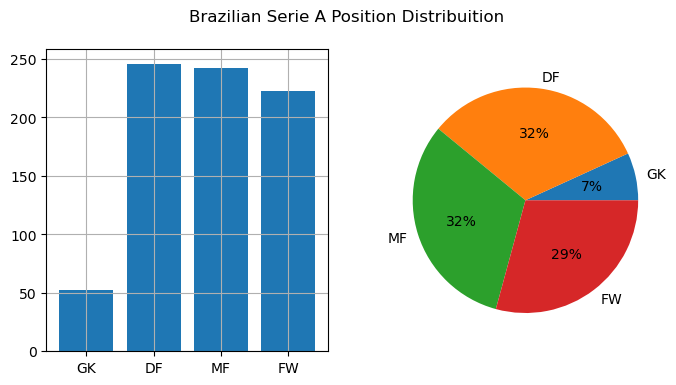

In [5]:
Player = df_Brasileirao_Players.copy()

GK = Player[Player.Pos.str.match("GK")]
DF = Player[Player.Pos.str.match("DF")]
MF = Player[Player.Pos.str.match("MF")]
FW = Player[Player.Pos.str.match("FW")]


label = [
    "GK",
    "DF",
    "MF",
    "FW",
]
Npos = [len(GK), len(DF), len(MF), len(FW)]

fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=100)
fig.suptitle("Brazilian Serie A Position Distribuition")

ax[0].grid()
ax[0].bar(
    label,
    Npos,
)
ax[1].pie(
    Npos,
    labels=label,
    autopct="%0.f%%",
)
plt.show()

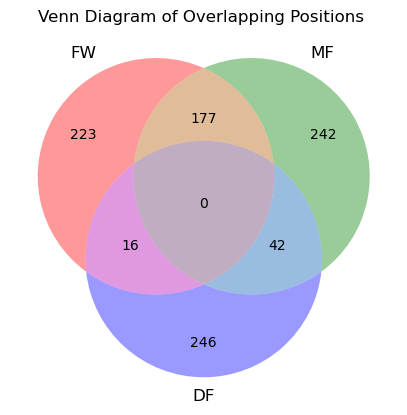

<IPython.core.display.Javascript object>

In [9]:
DFMF = Player[Player.Pos.str.match("^DF,MF|^MF,DF")]
DFFW = Player[Player.Pos.str.match("^DF,FW|^FW,DF")]
FWMF = Player[Player.Pos.str.match("^FW,MF|^MF,FW")]

fig = plt.figure(figsize=(5, 5), dpi=100)
plt.title("Venn Diagram of Overlapping Positions ")
venn3_unweighted(
    subsets=(len(FW), len(MF), len(FWMF), len(DF), len(DFFW), len(DFMF), 0),
    set_labels=("FW", "MF", "DF"),
)

plt.show()

### Position Statistics

### Position Classification

#### Training Model

Applying Logistic Regression to predict the type of player  (Offensive/Deffensive)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

<IPython.core.display.Javascript object>

Using only positions with FW and DF to train de Classifier because usually they have well stablished position. Defining all positions with FW as Offensive type using 1 and all others as Denfensive using 0;

In [13]:
# Filtering only players with a well know type
stablished_players = df_Brasileirao_Players[df_Brasileirao_Players.Pos.str.match("FW|DF")].reset_index(
    drop=True
)
# Dropping players with missing information
stablished_players.drop(stablished_players.loc[stablished_players["Recov"].isna() == True].index, inplace=True)
# Reseting Index
stablished_players.reset_index(drop=True, inplace=True)
# Setting Type 0 for all players
stablished_players["Type"] = np.zeros(len(stablished_players), dtype=int)
# Finding FW players
FW_index = stablished_players.loc[stablished_players.Pos.str.match("FW")].index
# Setting type 1 for FW players
stablished_players.loc[FW_index, "Type"] = 1
stablished_players.head()


,Rk,Player,Nation,Pos,Squad,Age,Born,90s,CrdY,CrdR,...,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Type
0,1,Abner,brBRA,DF,Atl Paranaense,21,2000,23.4,6,0,...,49,39,28,0.0,0.0,0,149.0,21.0,28.0,0
1,2,Adryelson,brBRA,DF,Botafogo (RJ),23,1998,16.1,1,0,...,0,22,12,0.0,0.0,1,56.0,76.0,34.0,0
2,3,Adson,brBRA,"FW,MF",Corinthians,21,2000,13.8,2,0,...,15,13,22,0.0,0.0,0,54.0,8.0,19.0,1
3,4,Airton,brBRA,FW,Atl Goianiense,22,1999,19.3,3,0,...,81,10,24,0.0,0.0,0,60.0,21.0,23.0,1
4,5,Carlos Alberto,brBRA,"FW,MF",América (MG),19,2002,1.7,1,0,...,3,4,1,0.0,0.0,0,5.0,4.0,9.0,1


<IPython.core.display.Javascript object>

Checking if the data is balanced

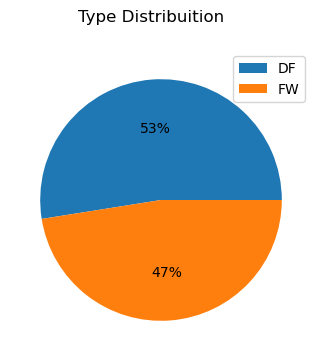

<IPython.core.display.Javascript object>

In [14]:
label = ["DF", "FW"]
perc = [len(stablished_players) - stablished_players["Type"].sum(), stablished_players["Type"].sum()]
fig = plt.figure(figsize=(8, 4), dpi=100)
fig.suptitle("Type Distribuition")

plt.pie(
    perc,
    autopct="%0.f%%",
)
plt.legend(label)
plt.show()

Preparing data for training

In [15]:
# Drop irrelevant Features
X = stablished_players.drop(["Rk", "Player", "Nation", "Pos", "Squad", "Born", "Type"], axis=1)

# Target
y = stablished_players[["Type"]]

# Trainig-Test spliting
training, testing, training_labels, testing_labels = train_test_split(
    X, y, test_size=0.25, random_state=42
)

<IPython.core.display.Javascript object>

In [16]:
# Preprocessing
scaler = preprocessing.StandardScaler().fit(training)
X_scaled_Traning = scaler.transform(training)
X_scaled_Test = scaler.transform(testing)

d:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
d:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
d:\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>

Creating the model, training and evaluating in the test set:

In [17]:
LogReg = LogisticRegression()

LogReg.fit(X_scaled_Traning, training_labels.values.ravel())

y_pred = LogReg.predict(X_scaled_Test)

d:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<IPython.core.display.Javascript object>

#### Classifier Metrics

Metrics details from https://blog.paperspace.com/deep-learning-metrics-precision-recall-accuracy/#:~:text=Accuracy%20is%20a%20metric%20that,the%20total%20number%20of%20predictions

##### Confusion Matrix

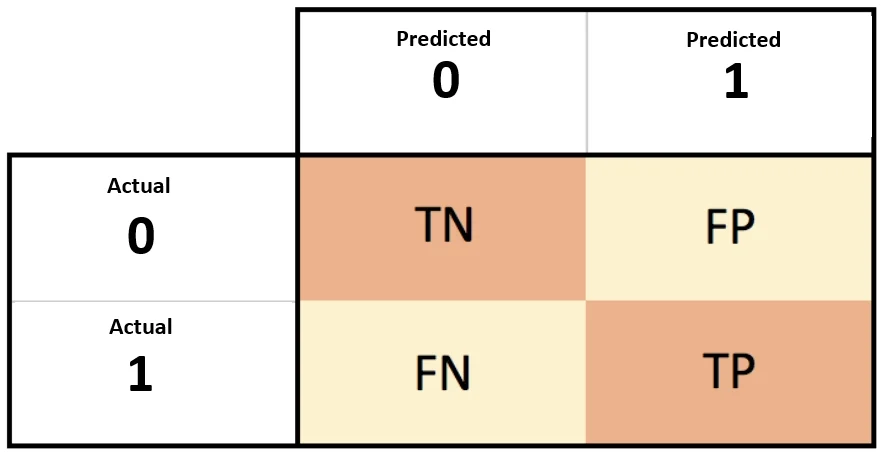

In [42]:
M = confusion_matrix(testing_labels, y_pred)

TN = M[0, 0]
print(f"The number of True Negative values is: {TN}")
TP = M[1, 1]
print(f"The number of True Positive values is: {TP}")
FP = M[0, 1]
print(f"The number of False Positive values is: {FP}")
FN = M[1, 0] 
print(f"The number of False Negative values is: {FN}")


The number of True Negative values is: 55
The number of True Positive values is: 48
The number of False Positive values is: 9
The number of False Negative values is: 3


<IPython.core.display.Javascript object>

Text(0.5, 257.44, 'Predicted')

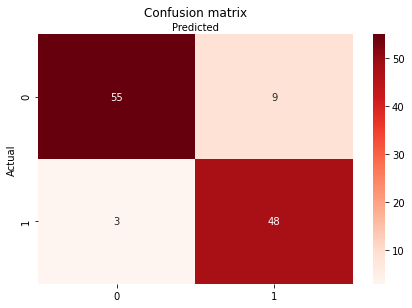

<IPython.core.display.Javascript object>

In [43]:
fig, ax = plt.subplots()

Type = ["Defensive", "Ofensive"]

tick_marks = np.arange(len(Type))
plt.xticks(tick_marks, Type)
plt.yticks(tick_marks, Type)


sns.heatmap(pd.DataFrame(M), annot=True, cmap="Reds", fmt="g")

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual")
plt.xlabel("Predicted")

##### Accuracy

Accuracy is a metric that generally describes how the model performs across all classes. It is useful when all classes are of equal importance. 

In [24]:
from sklearn.metrics import accuracy_score

<IPython.core.display.Javascript object>

######  $$ Accuracy = \frac{TP+TN}{TP+FP+FN+TN} $$

In [44]:
acc = (TP+TN)/(TP+FP+FN+TN)
print(f"Accuracy using definition: {round(100*acc,2)}% \n")
print(f"Accuracy using function: {round(100*accuracy_score(testing_labels, y_pred),2)}% \n")

Accuracy using definition: 89.57% 

Accuracy using function: 89.57% 



<IPython.core.display.Javascript object>

##### Precision

The precision is calculated as the ratio between the number of Positive samples correctly classified to the total number of samples classified as Positive (either correctly or incorrectly). The precision measures the model's accuracy in classifying a sample as positive.

In [31]:
from sklearn.metrics import precision_score

<IPython.core.display.Javascript object>

###### $$ Precision = \frac{TP}{TP+FP} $$

In [45]:
prc = TP/(TP+FP)
print(f"Precison using definition: {round(100*prc,2)}% \n")
print(f"Precison using function: {round(100*precision_score(testing_labels, y_pred),2)}% \n")

Precison using definition: 84.21% 

Precison using function: 84.21% 



<IPython.core.display.Javascript object>

##### Recall

The recall is calculated as the ratio between the number of Positive samples correctly classified as Positive to the total number of Positive samples. The recall measures the model's ability to detect Positive samples. The higher the recall, the more positive samples detected.

In [46]:
from sklearn.metrics import recall_score

<IPython.core.display.Javascript object>

###### $$ Recall = \frac{TP}{TP+FN}$$

In [50]:
rcall = TP/(TP+FN)
print(f"Recall using definition: {round(100*Rcall,2)}% \n")
print(f"Recall using function: {round(100*recall_score(testing_labels, y_pred),2)}% \n")

Recall using definition: 94.12% 

Recall using function: 94.12% 



<IPython.core.display.Javascript object>

##### F1Score

###### $$ F_1Score = 2*\frac{Precision*Recall}{Precision+Recall}$$

In [52]:
f1 = 2*(prc*rcall)/(prc+rcall)
print(f"F1Score using definition: {round(100*f1,2)}%")
print(f"F1Score using function: {round(100*f1_score(y_pred, testing_labels),2)}%")

F1Score using definition: 88.89%
F1Score using function: 88.89%


<IPython.core.display.Javascript object>

##### Statistical Inference

Using the model to predict the type of Midfield players and using another source of data to validate.

Preprossing,scaling and predicting using the new data:

In [53]:
MF_Players = df_Brasileirao_Players[
    df_Brasileirao_Players.Pos.str.match("^MF$")
].reset_index(drop=True)
MF_Players.drop(MF_Players.loc[MF_Players["Recov"].isna() == True].index, inplace=True)
MF_Players.reset_index(drop=True, inplace=True)


MF_Scaled = scaler.transform(
    MF_Players.drop(["Rk", "Player", "Nation", "Pos", "Squad", "Born"], axis=1)
)
MF_Players["PredictType"] = LogReg.predict(MF_Scaled)


Def_prob = LogReg.predict_proba(MF_Scaled)[:, 0]
y_prob = [round(100 * x, 2) if x > 0.5 else round(100 * (1 - x), 2) for x in Def_prob]
MF_Players["Probability(%)"] = np.array(y_prob)
MF_Players.head()

d:\anaconda\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


,Rk,Player,Nation,Pos,Squad,Age,Born,90s,CrdY,CrdR,...,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,PredictType,Probability(%)
0,7,Ale,brBRA,MF,América (MG),31,1990,21.4,2,1,...,28,21,0.0,2.0,0,184.0,27.0,29.0,0,99.78
1,12,Caio Alexandre,brBRA,MF,Fortaleza,22,1999,11.0,3,1,...,11,22,0.0,0.0,0,82.0,5.0,11.0,0,95.59
2,16,Allan,brBRA,MF,Atlético Mineiro,24,1997,30.4,10,0,...,25,30,0.0,1.0,0,168.0,16.0,6.0,0,99.90
3,26,André,brBRA,MF,Fluminense,20,2001,33.5,10,1,...,36,38,0.0,1.0,0,253.0,9.0,20.0,0,100.00
4,28,Andrey,brBRA,MF,Avaí,19,2002,0.3,0,0,...,0,0,0.0,0.0,0,1.0,0.0,0.0,1,68.79


<IPython.core.display.Javascript object>

In [56]:
MF_Players[["Player", "PredictType", "Probability(%)"]].sample(n=10, random_state=42)

,Player,PredictType,Probability(%)
128,Budiga Roni,0,99.21
45,Lucas Fernandes,1,83.16
134,Lucas Sasha,0,98.57
156,Xavier,0,51.48
90,Willian Maranhão,1,66.67
29,Giorgian De Arrascaeta,1,97.70
96,Jacob Montes,1,60.02
98,Andrey Ramos do Nascimento,1,71.30
95,Gabriel Menino,0,83.34
140,David Terans,1,98.82


<IPython.core.display.Javascript object>

## Premier League

In [6]:
df_PremierLeague_Players.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,CrdY,CrdR,...,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%,Matches
0,1,Max Aarons,engENG,DF,Norwich City,21,2000,32.0,8,0,...,28,44,0,2,1,154,13,50,20.6,Matches
1,2,Che Adams,sctSCO,FW,Southampton,25,1996,22.7,0,0,...,8,6,0,0,0,70,62,91,40.5,Matches
2,3,Rayan Aït Nouri,frFRA,"DF,MF",Wolves,20,2001,20.3,4,0,...,22,36,1,0,0,128,17,13,56.7,Matches
3,4,Kristoffer Ajer,noNOR,DF,Brentford,23,1998,22.2,5,0,...,26,18,0,0,0,109,49,31,61.3,Matches
4,5,Nathan Aké,nlNED,DF,Manchester City,26,1995,10.3,0,0,...,8,9,0,0,0,43,37,12,75.5,Matches


<IPython.core.display.Javascript object>

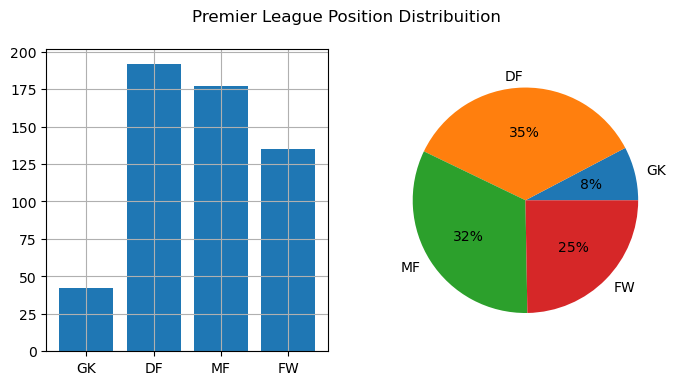

<IPython.core.display.Javascript object>

In [7]:
Player = df_PremierLeague_Players.copy()

GK = Player[Player.Pos.str.match("GK")]
DF = Player[Player.Pos.str.match("DF")]
MF = Player[Player.Pos.str.match("MF")]
FW = Player[Player.Pos.str.match("FW")]


label = [
    "GK",
    "DF",
    "MF",
    "FW",
]
Npos = [len(GK), len(DF), len(MF), len(FW)]

fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=100)
fig.suptitle("Premier League Position Distribuition")

ax[0].grid()
ax[0].bar(
    label,
    Npos,
)
ax[1].pie(
    Npos,
    labels=label,
    autopct="%0.f%%",
)
plt.show()

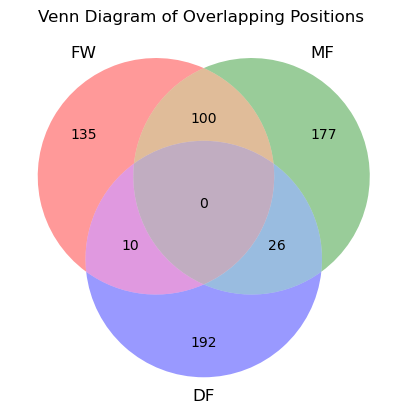

<IPython.core.display.Javascript object>

In [8]:
DFMF = Player[Player.Pos.str.match("^DF,MF|^MF,DF")]
DFFW = Player[Player.Pos.str.match("^DF,FW|^FW,DF")]
FWMF = Player[Player.Pos.str.match("^FW,MF|^MF,FW")]

fig = plt.figure(figsize=(5, 5), dpi=100)
plt.title("Venn Diagram of Overlapping Positions ")
venn3_unweighted(
    subsets=(len(FW), len(MF), len(FWMF), len(DF), len(DFFW), len(DFMF), 0),
    set_labels=("FW", "MF", "DF"),
)

plt.show()

## Ligue 1 

In [9]:
df_Ligue1_Players.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,CrdY,CrdR,...,Off,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost
0,1,Yunis Abdelhamid,maMAR,DF,Reims,33,1987,33.1,5,1,...,0,4,68,27,0.0,1.0,0,195.0,62.0,38.0
1,2,Salis Abdul Samed,ghGHA,MF,Clermont Foot,21,2000,27.4,12,3,...,0,14,42,23,0.0,0.0,0,186.0,17.0,20.0
2,3,Laurent Abergel,frFRA,MF,Lorient,28,1993,32.8,9,0,...,1,37,55,60,0.0,0.0,0,264.0,11.0,7.0
3,4,Charles Abi,frFRA,FW,Saint-Étienne,21,2000,0.5,0,0,...,0,1,0,0,0.0,0.0,0,1.0,0.0,0.0
4,5,Matthis Abline,frFRA,FW,Rennes,18,2003,1.1,0,0,...,0,0,0,0,0.0,0.0,0,0.0,0.0,7.0


<IPython.core.display.Javascript object>

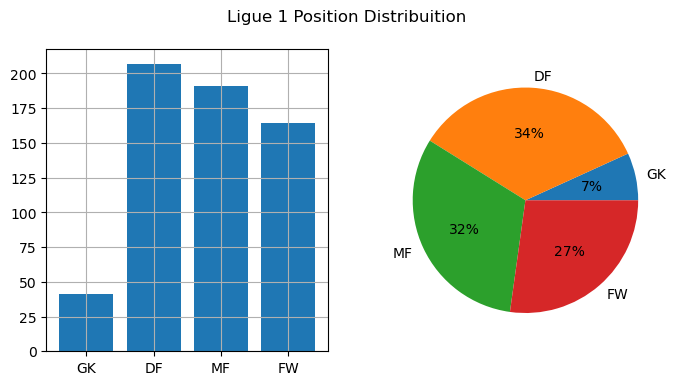

<IPython.core.display.Javascript object>

In [10]:
Player = df_Ligue1_Players.copy()

GK = Player[Player.Pos.str.match("GK")]
DF = Player[Player.Pos.str.match("DF")]
MF = Player[Player.Pos.str.match("MF")]
FW = Player[Player.Pos.str.match("FW")]


label = [
    "GK",
    "DF",
    "MF",
    "FW",
]
Npos = [len(GK), len(DF), len(MF), len(FW)]

fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=100)
fig.suptitle("Ligue 1 Position Distribuition")

ax[0].grid()
ax[0].bar(
    label,
    Npos,
)
ax[1].pie(
    Npos,
    labels=label,
    autopct="%0.f%%",
)
plt.show()

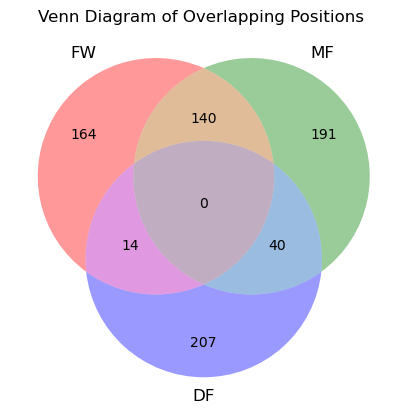

<IPython.core.display.Javascript object>

In [11]:
DFMF = Player[Player.Pos.str.match("^DF,MF|^MF,DF")]
DFFW = Player[Player.Pos.str.match("^DF,FW|^FW,DF")]
FWMF = Player[Player.Pos.str.match("^FW,MF|^MF,FW")]

fig = plt.figure(figsize=(5, 5), dpi=100)
plt.title("Venn Diagram of Overlapping Positions ")
venn3_unweighted(
    subsets=(len(FW), len(MF), len(FWMF), len(DF), len(DFFW), len(DFMF), 0),
    set_labels=("FW", "MF", "DF"),
)

plt.show()

## La Liga

In [12]:
df_LaLiga_Players.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,CrdY,CrdR,...,Off,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost
0,1,Luis Abram,pePER,DF,Granada,25,1996,6.2,2,0,...,0,0,5,3,0.0,0.0,1,14.0,7.0,14.0
1,2,Marcos Acuña,arARG,DF,Sevilla,29,1991,25.1,10,0,...,0,178,14,29,0.0,1.0,0,173.0,22.0,32.0
2,3,Martin Agirregabiria,esESP,DF,Alavés,25,1996,18.0,4,0,...,1,45,25,22,0.0,1.0,0,79.0,31.0,27.0
3,4,Julen Agirrezabala,esESP,GK,Athletic Club,20,2000,4.0,0,0,...,0,0,0,0,0.0,0.0,0,6.0,0.0,0.0
4,5,Sergio Agüero,arARG,FW,Barcelona,33,1988,1.7,0,0,...,1,3,0,1,0.0,0.0,0,3.0,3.0,2.0


<IPython.core.display.Javascript object>

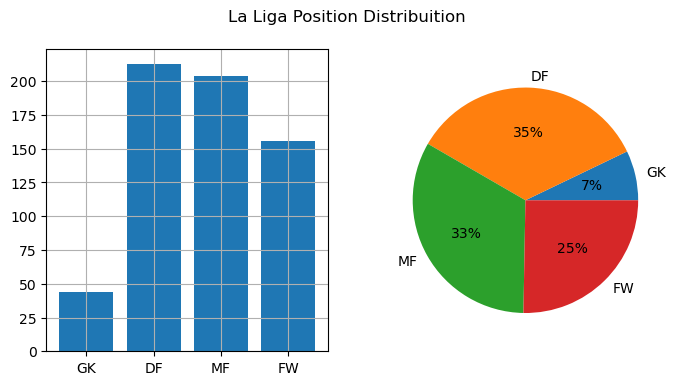

<IPython.core.display.Javascript object>

In [13]:
Player = df_LaLiga_Players.copy()

GK = Player[Player.Pos.str.match("GK")]
DF = Player[Player.Pos.str.match("DF")]
MF = Player[Player.Pos.str.match("MF")]
FW = Player[Player.Pos.str.match("FW")]


label = [
    "GK",
    "DF",
    "MF",
    "FW",
]
Npos = [len(GK), len(DF), len(MF), len(FW)]

fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=100)
fig.suptitle("La Liga Position Distribuition")

ax[0].grid()
ax[0].bar(
    label,
    Npos,
)
ax[1].pie(
    Npos,
    labels=label,
    autopct="%0.f%%",
)
plt.show()

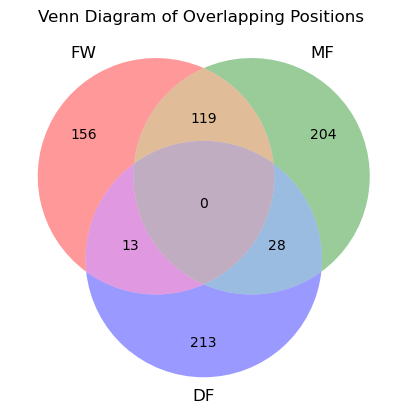

<IPython.core.display.Javascript object>

In [14]:
DFMF = Player[Player.Pos.str.match("^DF,MF|^MF,DF")]
DFFW = Player[Player.Pos.str.match("^DF,FW|^FW,DF")]
FWMF = Player[Player.Pos.str.match("^FW,MF|^MF,FW")]

fig = plt.figure(figsize=(5, 5), dpi=100)
plt.title("Venn Diagram of Overlapping Positions ")
venn3_unweighted(
    subsets=(len(FW), len(MF), len(FWMF), len(DF), len(DFFW), len(DFMF), 0),
    set_labels=("FW", "MF", "DF"),
)

plt.show()

## Italian Serie A

In [15]:
df_Italy_Players.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,CrdY,CrdR,...,Off,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost
0,1,Tammy Abraham,engENG,FW,Roma,23,1997,34.3,9,0,...,17,16,5,13,1.0,1.0,0,68.0,78.0,80.0
1,2,Francesco Acerbi,itITA,DF,Lazio,33,1988,28.2,2,1,...,4,3,34,12,1.0,0.0,0,162.0,69.0,43.0
2,3,Michel Aebischer,chSUI,MF,Bologna,24,1997,4.9,1,0,...,0,7,6,5,0.0,0.0,0,27.0,5.0,4.0
3,4,Felix Afena-Gyan,ghGHA,"FW,MF",Roma,18,2003,7.4,5,1,...,4,8,3,3,0.0,0.0,0,31.0,11.0,15.0
4,5,Kevin Agudelo,coCOL,"MF,FW",Spezia,22,1998,13.7,2,1,...,0,22,8,26,0.0,0.0,0,67.0,15.0,14.0


<IPython.core.display.Javascript object>

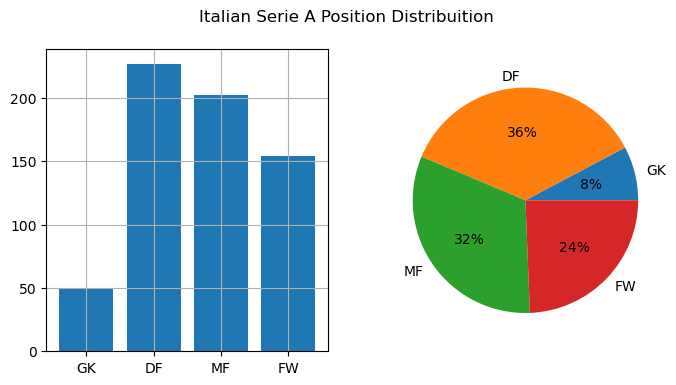

<IPython.core.display.Javascript object>

In [16]:
Player = df_Italy_Players.copy()

GK = Player[Player.Pos.str.match("GK")]
DF = Player[Player.Pos.str.match("DF")]
MF = Player[Player.Pos.str.match("MF")]
FW = Player[Player.Pos.str.match("FW")]


label = [
    "GK",
    "DF",
    "MF",
    "FW",
]
Npos = [len(GK), len(DF), len(MF), len(FW)]

fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=100)
fig.suptitle("Italian Serie A Position Distribuition")

ax[0].grid()
ax[0].bar(
    label,
    Npos,
)
ax[1].pie(
    Npos,
    labels=label,
    autopct="%0.f%%",
)
plt.show()

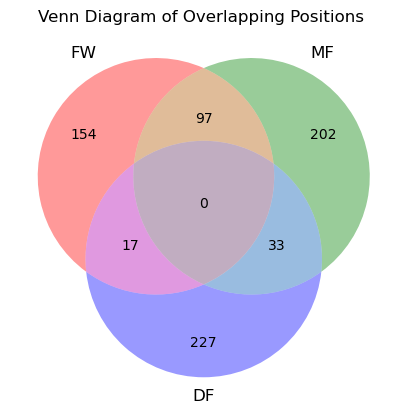

<IPython.core.display.Javascript object>

In [17]:
DFMF = Player[Player.Pos.str.match("^DF,MF|^MF,DF")]
DFFW = Player[Player.Pos.str.match("^DF,FW|^FW,DF")]
FWMF = Player[Player.Pos.str.match("^FW,MF|^MF,FW")]

fig = plt.figure(figsize=(5, 5), dpi=100)
plt.title("Venn Diagram of Overlapping Positions ")
venn3_unweighted(
    subsets=(len(FW), len(MF), len(FWMF), len(DF), len(DFFW), len(DFMF), 0),
    set_labels=("FW", "MF", "DF"),
)

plt.show()

# Logistic Regression

<IPython.core.display.Javascript object>

In [19]:
DF = df_Brasileirao_Players[df_Brasileirao_Players.Pos.str.match("FW|DF")].reset_index(
    drop=True
)
DF.drop(DF.loc[DF["Recov"].isna() == True].index, inplace=True)
DF.reset_index(drop=True, inplace=True)
DF["Type"] = np.zeros(len(DF), dtype=int)
FW_index = DF.loc[DF.Pos.str.match("FW")].index
DF.loc[FW_index, "Type"] = 1
DF.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,CrdY,CrdR,...,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Type
0,1,Abner,brBRA,DF,Atl Paranaense,21,2000,23.4,6,0,...,49,39,28,0.0,0.0,0,149.0,21.0,28.0,0
1,2,Adryelson,brBRA,DF,Botafogo (RJ),23,1998,16.1,1,0,...,0,22,12,0.0,0.0,1,56.0,76.0,34.0,0
2,3,Adson,brBRA,"FW,MF",Corinthians,21,2000,13.8,2,0,...,15,13,22,0.0,0.0,0,54.0,8.0,19.0,1
3,4,Airton,brBRA,FW,Atl Goianiense,22,1999,19.3,3,0,...,81,10,24,0.0,0.0,0,60.0,21.0,23.0,1
4,5,Carlos Alberto,brBRA,"FW,MF",América (MG),19,2002,1.7,1,0,...,3,4,1,0.0,0.0,0,5.0,4.0,9.0,1


<IPython.core.display.Javascript object>

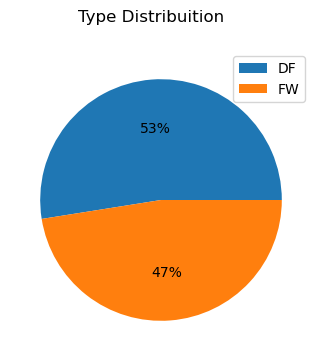

<IPython.core.display.Javascript object>

In [20]:
label = ["DF", "FW"]
perc = [len(DF) - DF["Type"].sum(), DF["Type"].sum()]
fig = plt.figure(figsize=(8, 4), dpi=100)
fig.suptitle("Type Distribuition")

plt.pie(
    perc,
    autopct="%0.f%%",
)
plt.legend(label)
plt.show()

In [21]:
# Drop irrelevant Features
X = DF.drop(["Rk", "Player", "Nation", "Pos", "Squad", "Born", "Type"], axis=1)

# Target
y = DF[["Type"]]

# Trainig-Test spliting
training, testing, training_labels, testing_labels = train_test_split(
    X, y, test_size=0.25, random_state=42
)

<IPython.core.display.Javascript object>

In [22]:
# Preprocessing
scaler = preprocessing.StandardScaler().fit(training)
X_scaled_Traning = scaler.transform(training)
X_scaled_Test = scaler.transform(testing)

<IPython.core.display.Javascript object>

Creating the model, training and evaluating in the test set:

In [23]:
LogReg = LogisticRegression()

LogReg.fit(X_scaled_Traning, training_labels.values.ravel())

y_pred = LogReg.predict(X_scaled_Test)

<IPython.core.display.Javascript object>

## Classifier Metrics

### Confusion Matrix 

###### 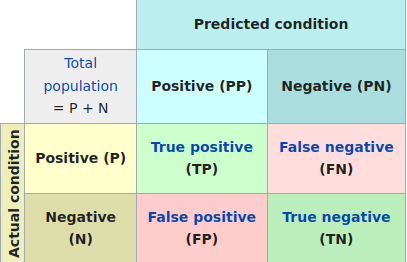

In [24]:
M = confusion_matrix(testing_labels, y_pred)

TP = M[0, 0]
print(f"The number of True Positive values is: {TP}")
TN = M[1, 1]
print(f"The number of True Negative values is: {TN}")
FP = M[0, 1]
print(f"The number of False Positive values is: {FP}")
FN = M[1, 0] 
print(f"The number of False Negative values is: {FP}")


The number of True Positive values is: 55
The number of True Negative values is: 48
The number of False Positive values is: 9
The number of False Negative values is: 9


<IPython.core.display.Javascript object>

Text(0.5, 257.44, 'Predicted')

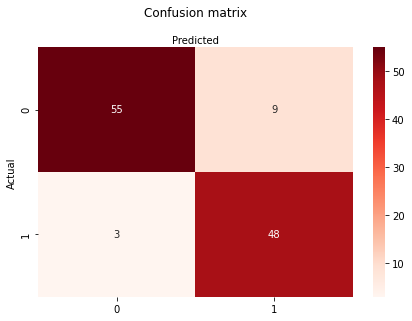

<IPython.core.display.Javascript object>

In [25]:
fig, ax = plt.subplots()

Type = ["Defensive", "Ofensive"]

tick_marks = np.arange(len(Type))
plt.xticks(tick_marks, Type)
plt.yticks(tick_marks, Type)


sns.heatmap(pd.DataFrame(M), annot=True, cmap="Reds", fmt="g")

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual")
plt.xlabel("Predicted")

### Accuracy

####  $$ Accuracy = \frac{TP+TN}{TP+FP+FN+TN} $$

In [26]:
from sklearn.metrics import accuracy_score

<IPython.core.display.Javascript object>

In [27]:
accuracy_score(testing_labels, y_pred)

0.8956521739130435

<IPython.core.display.Javascript object>

In [28]:
Accuracy = (TP + TN) / (TP + FP + FN + TN)

<IPython.core.display.Javascript object>

In [29]:
print(f"The Accuracy of the model is: {round(100*Accuracy,2)}%")

The Accuracy of the model is: 89.57%


<IPython.core.display.Javascript object>

### Precision

#### $$ Precision = \frac{TP}{TP+FP} $$

In [30]:
from sklearn.metrics import precision_score

<IPython.core.display.Javascript object>

In [31]:
Precision = precision_score(testing_labels, y_pred)

<IPython.core.display.Javascript object>

In [32]:
print(f"The Precision of the model is: {round(100*Precision,2)}%")

The Precision of the model is: 84.21%


<IPython.core.display.Javascript object>

### Recall

#### $$ Recall = \frac{TP}{TP+FN}$$

In [33]:
from sklearn.metrics import recall_score

<IPython.core.display.Javascript object>

In [34]:
Recall = recall_score(testing_labels, y_pred)

<IPython.core.display.Javascript object>

In [35]:
print(f"The Recall of the model is: {round(100*Recall,2)}%")

The Recall of the model is: 94.12%


<IPython.core.display.Javascript object>

### F1Score

$$ F_1Score = 2*\frac{Precision*Recall}{Precision+Recall}$$

In [36]:
F1score = f1_score(y_pred, testing_labels)

<IPython.core.display.Javascript object>

In [37]:
print(f"The F1Score of the model is: {round(100*F1score,2)}%")

The F1Score of the model is: 88.89%


<IPython.core.display.Javascript object>

## Statistical Inference

Using a different source of data to test the classifier in only LT players;

Preprossing,scaling and predicting using the new data:

Probability needes to be fixed, first column is the probability of beeing 0 and second column proability of beeing 1;

In [38]:
MF_Players = df_Brasileirao_Players[
    df_Brasileirao_Players.Pos.str.match("^MF$")
].reset_index(drop=True)
MF_Players.drop(MF_Players.loc[MF_Players["Recov"].isna() == True].index, inplace=True)
MF_Players.reset_index(drop=True, inplace=True)


MF_Scaled = scaler.transform(
    MF_Players.drop(["Rk", "Player", "Nation", "Pos", "Squad", "Born"], axis=1)
)
MF_Players["PredictType"] = LogReg.predict(MF_Scaled)


Def_prob = LogReg.predict_proba(MF_Scaled)[:, 0]
y_prob = [round(100 * x, 2) if x > 0.5 else round(100 * (1 - x), 2) for x in Def_prob]
MF_Players["Probability(%)"] = np.array(y_prob)
MF_Players.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,CrdY,CrdR,...,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,PredictType,Probability(%)
0,7,Ale,brBRA,MF,América (MG),31,1990,21.4,2,1,...,28,21,0.0,2.0,0,184.0,27.0,29.0,0,99.82
1,12,Caio Alexandre,brBRA,MF,Fortaleza,22,1999,11.0,3,1,...,11,22,0.0,0.0,0,82.0,5.0,11.0,0,95.69
2,16,Allan,brBRA,MF,Atlético Mineiro,24,1997,30.4,10,0,...,25,30,0.0,1.0,0,168.0,16.0,6.0,0,99.91
3,26,André,brBRA,MF,Fluminense,20,2001,33.5,10,1,...,36,38,0.0,1.0,0,253.0,9.0,20.0,0,100.00
4,28,Andrey,brBRA,MF,Avaí,19,2002,0.3,0,0,...,0,0,0.0,0.0,0,1.0,0.0,0.0,1,68.94


<IPython.core.display.Javascript object>

In [39]:
MF_Players[["Player", "PredictType", "Probability(%)"]].sample(n=10, random_state=42)

,Player,PredictType,Probability(%)
128,Budiga Roni,0,99.28
45,Lucas Fernandes,1,83.46
134,Lucas Sasha,0,98.67
156,Xavier,0,51.52
90,Willian Maranhão,1,66.55
29,Giorgian De Arrascaeta,1,97.65
96,Jacob Montes,1,60.15
98,Andrey Ramos do Nascimento,1,70.30
95,Gabriel Menino,0,84.00
140,David Terans,1,98.79


<IPython.core.display.Javascript object>

In [58]:
MF_Players[["Player","Squad","Born", "PredictType", "Probability(%)"]].sample(n=10, random_state=42)

,Player,Squad,Born,PredictType,Probability(%)
128,Budiga Roni,Corinthians,1999,0,99.21
45,Lucas Fernandes,Botafogo (RJ),1997,1,83.16
134,Lucas Sasha,Fortaleza,1990,0,98.57
156,Xavier,Corinthians,2000,0,51.48
90,Willian Maranhão,Santos,1995,1,66.67
29,Giorgian De Arrascaeta,Flamengo,1994,1,97.70
96,Jacob Montes,Botafogo (RJ),1998,1,60.02
98,Andrey Ramos do Nascimento,Coritiba,1998,1,71.30
95,Gabriel Menino,Palmeiras,2000,0,83.34
140,David Terans,Atl Paranaense,1994,1,98.82


<IPython.core.display.Javascript object>